In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [3]:
np.random.seed(420)
songs = pd.read_csv('training_data.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
classify_songs =  pd.read_csv('songs_to_classify.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()

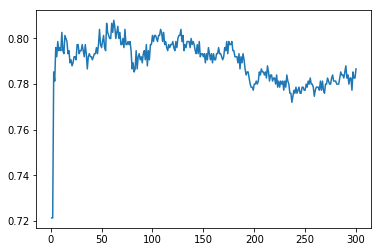

In [31]:
np.random.seed(420)
songs = pd.read_csv('training_data.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
classify_songs =  pd.read_csv('songs_to_classify.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
#Dividing training data using crossfold
randomize_indices = np.random.choice(songs.shape[0], songs.shape[0], replace=False) 
dummies = pd.get_dummies(songs, columns=['key','time_signature'])

folds = 10
est = 300
correctness = np.zeros((est,folds))

for j in range(folds):
    n=np.ceil(songs.shape[0]/folds)
    validationIndex=np.arange(j*n, min(j*n+n,songs.shape[0]), 1).astype('int')
    randomize_validationIndex = randomize_indices[validationIndex]
    train = dummies.iloc[~songs.index.isin(randomize_validationIndex)]
    test = dummies.iloc[randomize_validationIndex]  
    xTrain = train.drop(columns=['label','index'])
    yTrain = train['label']
    xTest = test.drop(columns=['label','index'])
    yTest = test['label']
    
    for i in range(est):
        ada = AdaBoostClassifier(n_estimators=i+1)
        ada.fit(xTrain, yTrain)
        pred = ada.predict(xTest)
        correctness[i][j]=np.mean(pred==yTest)
avgCorr = []
for i in range(est):
    avgCorr.append(np.mean(correctness[i][:]))
K = np.linspace(1,est,est)
plt.plot(K,avgCorr)
plt.show()

In [32]:
print(np.max(avgCorr))
maxIndex=avgCorr.index(max(avgCorr))
print(maxIndex)

0.808
61


In [36]:
#mygelvinst
#optimal estimators = 61
trainI = np.random.choice(songs.shape[0],size=750, replace=False)
trainIndex = songs.index.isin(trainI)
train = songs.iloc[trainIndex]
test = songs.iloc[~trainIndex]
#Training data
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
train = dummies.iloc[trainIndex]
xTrain = train.drop(columns=['label','index'])
yTrain = train['label']
ada = AdaBoostClassifier(n_estimators=61)

ada.fit(xTrain,yTrain)

dummies = pd.get_dummies(classify_songs, columns=['key','time_signature'])
classSongs = dummies.drop(columns=['index'])

pred = ada.predict(classSongs)
print(pred)

[0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1]


In [38]:
string = np.array2string(pred)
string.replace(" ", "")

'[0001001100100110101100110011111011111\n1010001110110001101100010100111101011\n0101101101011110101010111110110101111\n1101110100110111010101111111110101100\n1011001111101101101111111000101011111\n110100110100111]'

In [ ]:
00010011001001101011001100111110111111010001110110001101100010100111101011010110110101111010101011111011010111111011101001101110101011111111101011001011001111101101101111111000101011111110100110100111